### AI-Driven Optimization and Predictive Intelligence for IoT-Enabled Smart Manufacturing Systems

The column production_status contains only a single class (0) across all samples.
And also for efficiency_score column the dataset description claims efficiency ranges from 0–100, empirical analysis showed a maximum of 45.9. Therefore, absolute thresholds were inappropriate. I adopted percentile-based and normalized labeling strategies to define relative production efficiency.

#### MODULE 1: Industrial IoT Data Audit & KPI Validation

🎯 Objective:
Evaluate sensor reliability, KPI validity, and data readiness for ML.

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("Production System Dataset.csv")

In [3]:
df

,timestamp,machine_id,machine_type,temperature,vibration_level,power_consumption,pressure,material_flow_rate,cycle_time,error_rate,downtime,maintenance_flag,efficiency_score,production_status
0,2025-03-10 08:00:00,M003,Welder,78.302879,2.043751,23.059855,5.088076,20.011026,118.146510,0.883246,0,0,11.675410,0
1,2025-03-10 08:01:00,M004,Conveyor,80.877076,2.175590,16.012814,5.412956,18.375739,123.062058,0.777073,38,0,3.292706,0
2,2025-03-10 08:02:00,M001,Drill,71.315418,2.154465,15.759164,5.769405,17.112107,122.754064,0.757374,37,0,5.762582,0
3,2025-03-10 08:03:00,M003,Conveyor,76.496198,2.245978,16.490268,4.618784,21.090684,118.990270,0.796481,39,0,0.851911,0
4,2025-03-10 08:04:00,M003,CNC,73.612202,2.097302,18.064286,5.431250,20.868592,113.749872,0.813361,0,0,18.663902,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2455,2025-03-12 00:55:00,M001,Conveyor,80.585617,1.744735,14.463169,5.034138,20.826884,113.009590,0.652834,0,0,34.716573,0
2456,2025-03-12 00:56:00,M003,Drill,78.171483,2.732367,19.990335,4.971981,18.291071,132.987186,0.988201,0,0,1.179945,0
2457,2025-03-12 00:57:00,M003,Welder,78.782847,2.131138,19.874735,5.290168,22.551457,114.350925,0.847650,0,0,15.234984,0
2458,2025-03-12 00:58:00,M001,Drill,77.939129,2.027617,19.660323,4.924919,22.706616,117.406875,0.807874,0,0,19.212551,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2460 entries, 0 to 2459
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   timestamp           2460 non-null   object 
 1   machine_id          2460 non-null   object 
 2   machine_type        2460 non-null   object 
 3   temperature         2411 non-null   float64
 4   vibration_level     2404 non-null   float64
 5   power_consumption   2405 non-null   float64
 6   pressure            2460 non-null   float64
 7   material_flow_rate  2460 non-null   float64
 8   cycle_time          2460 non-null   float64
 9   error_rate          2460 non-null   float64
 10  downtime            2460 non-null   int64  
 11  maintenance_flag    2460 non-null   int64  
 12  efficiency_score    2460 non-null   float64
 13  production_status   2460 non-null   int64  
dtypes: float64(8), int64(3), object(3)
memory usage: 269.2+ KB


In [5]:
df.describe()

,temperature,vibration_level,power_consumption,pressure,material_flow_rate,cycle_time,error_rate,downtime,maintenance_flag,efficiency_score,production_status
count,2411.000000,2404.000000,2405.000000,2460.000000,2460.000000,2460.000000,2460.000000,2460.000000,2460.000000,2460.000000,2460.0
mean,77.938602,2.230957,18.422577,4.993933,20.032925,120.071115,0.794854,12.313008,0.059350,15.577832,0.0
std,3.944714,1.117706,2.669908,0.391494,1.511022,5.057995,0.085257,18.408838,0.236326,10.763130,0.0
min,66.136665,1.048872,10.326689,3.431040,15.376157,101.823999,0.540933,0.000000,0.000000,0.000000,0.0
25%,75.240313,1.806224,16.741559,4.732438,19.017601,116.624522,0.735993,0.000000,0.000000,5.760614,0.0
50%,77.734034,2.005956,18.159299,4.992426,20.031692,120.089570,0.789355,0.000000,0.000000,17.017636,0.0
75%,80.165885,2.230489,19.699169,5.251234,21.050319,123.567379,0.842145,36.000000,0.000000,23.980193,0.0
max,94.569177,9.109769,34.368410,6.351107,25.143366,142.395421,1.000000,50.000000,1.000000,45.906702,0.0


In [6]:
df.drop("production_status",axis = 1,inplace = True)

There are NULL values in temperature(49 rows), vibration_level(56 rows) and power_consumption(55 rows).

We will remove only those rows who have missing value of subset of atleast 2 columns missing value.

In [7]:
df[df["temperature"].isna() & df["power_consumption"].isna()] 

,timestamp,machine_id,machine_type,temperature,vibration_level,power_consumption,pressure,material_flow_rate,cycle_time,error_rate,downtime,maintenance_flag,efficiency_score
1011,2025-03-11 00:51:00,M001,Drill,NaN,2.093447,NaN,5.824169,19.869277,133.353377,0.847503,42,0,0.000000
1964,2025-03-11 16:44:00,M001,Welder,NaN,1.593874,NaN,4.712606,22.266925,113.210884,0.719602,0,0,28.039785


In [8]:
df = df.dropna(subset=["temperature", "power_consumption"], how="all")

In [9]:
df[df["vibration_level"].isna() & df["power_consumption"].isna()] 

,timestamp,machine_id,machine_type,temperature,vibration_level,power_consumption,pressure,material_flow_rate,cycle_time,error_rate,downtime,maintenance_flag,efficiency_score
708,2025-03-10 19:48:00,M004,Conveyor,77.011516,NaN,NaN,4.570523,19.668816,121.030677,0.894141,44,0,0.0


In [10]:
df = df.dropna(subset=["vibration_level", "power_consumption"], how="all")

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2457 entries, 0 to 2459
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   timestamp           2457 non-null   object 
 1   machine_id          2457 non-null   object 
 2   machine_type        2457 non-null   object 
 3   temperature         2410 non-null   float64
 4   vibration_level     2402 non-null   float64
 5   power_consumption   2405 non-null   float64
 6   pressure            2457 non-null   float64
 7   material_flow_rate  2457 non-null   float64
 8   cycle_time          2457 non-null   float64
 9   error_rate          2457 non-null   float64
 10  downtime            2457 non-null   int64  
 11  maintenance_flag    2457 non-null   int64  
 12  efficiency_score    2457 non-null   float64
dtypes: float64(8), int64(2), object(3)
memory usage: 268.7+ KB


Time-Series Interpolation per Machine

###### Why: Industrial sensor data is almost always temporal, with each machine producing correlated measurements over time. Linear or spline interpolation preserves local trends and avoids creating artificial “flat” median values

In [12]:
df['timestamp_formatted'] = pd.to_datetime(
    df['timestamp'],
    dayfirst=True,
    errors='coerce'
)

In [13]:
df = df.sort_values(["machine_id", "timestamp_formatted"])


In [14]:
cols = ["temperature", "vibration_level", "power_consumption"]

for col in cols:
    df[col] = df.groupby("machine_id")[col].transform(lambda x: x.interpolate(method='linear'))


In [15]:
df["machine_type"].value_counts()

machine_type
Welder      637
CNC         630
Conveyor    615
Drill       575
Name: count, dtype: int64

In [16]:
df

,timestamp,machine_id,machine_type,temperature,vibration_level,power_consumption,pressure,material_flow_rate,cycle_time,error_rate,downtime,maintenance_flag,efficiency_score,timestamp_formatted
2,2025-03-10 08:02:00,M001,Drill,71.315418,2.154465,15.759164,5.769405,17.112107,122.754064,0.757374,37,0,5.762582,2025-10-03 08:02:00
6,2025-03-10 08:06:00,M001,Welder,91.700813,7.427527,27.746653,4.948131,21.954393,122.757183,1.000000,0,1,0.000000,2025-10-03 08:06:00
7,2025-03-10 08:07:00,M001,CNC,70.505322,1.592745,21.387094,4.385388,19.002452,123.629106,0.780886,0,0,21.911376,2025-10-03 08:07:00
15,2025-03-10 08:15:00,M001,Drill,74.000923,2.104579,18.513502,4.354100,19.338235,119.088791,0.825168,41,0,0.000000,2025-10-03 08:15:00
21,2025-03-10 08:21:00,M001,CNC,74.888519,2.262851,15.355305,5.242705,21.019072,123.963701,0.806905,0,0,19.309473,2025-10-03 08:21:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2442,2025-03-12 00:42:00,M004,Welder,74.738768,2.132695,16.655213,5.258528,19.778017,111.567149,0.781292,0,0,21.870821,2025-12-03 00:42:00
2443,2025-03-12 00:43:00,M004,Drill,78.329341,1.774781,18.673000,5.589799,22.564645,116.158383,0.730031,36,0,8.996942,2025-12-03 00:43:00
2444,2025-03-12 00:44:00,M004,Drill,76.693136,1.654401,14.866081,4.629504,21.744484,121.223874,0.672732,0,0,32.726801,2025-12-03 00:44:00
2448,2025-03-12 00:48:00,M004,Welder,82.146918,5.505854,23.767258,5.038011,20.050935,115.682008,1.000000,0,1,0.000000,2025-12-03 00:48:00


In [18]:
df.describe()


,temperature,vibration_level,power_consumption,pressure,material_flow_rate,cycle_time,error_rate,downtime,maintenance_flag,efficiency_score,timestamp_formatted
count,2457.000000,2457.000000,2457.000000,2457.000000,2457.000000,2457.000000,2457.000000,2457.00000,2457.000000,2457.000000,2457
mean,77.916398,2.231872,18.418595,4.993882,20.032230,120.068111,0.794822,12.29304,0.059422,15.585441,2025-10-23 04:27:44.639804672
min,66.136665,1.048872,10.326689,3.431040,15.376157,101.823999,0.540933,0.00000,0.000000,0.000000,2025-10-03 08:00:00
25%,75.214067,1.809338,16.745159,4.733982,19.015948,116.625311,0.736048,0.00000,0.000000,5.762582,2025-10-03 18:14:00
50%,77.705249,2.008633,18.159299,4.992665,20.032498,120.089277,0.789341,0.00000,0.000000,17.027414,2025-11-03 04:30:00
75%,80.146578,2.231225,19.681213,5.251231,21.050315,123.563310,0.842019,36.00000,0.000000,23.978531,2025-11-03 14:44:00
max,94.569177,9.109769,34.368410,6.351107,25.143366,142.395421,1.000000,50.00000,1.000000,45.906702,2025-12-03 00:59:00
std,3.939757,1.111553,2.652912,0.391240,1.511251,5.052048,0.085266,18.39754,0.236461,10.757582,NaN


In [19]:
df["downtime_event"] = (df["downtime"] > 0).astype(int)


<Axes: xlabel='efficiency_score', ylabel='Count'>

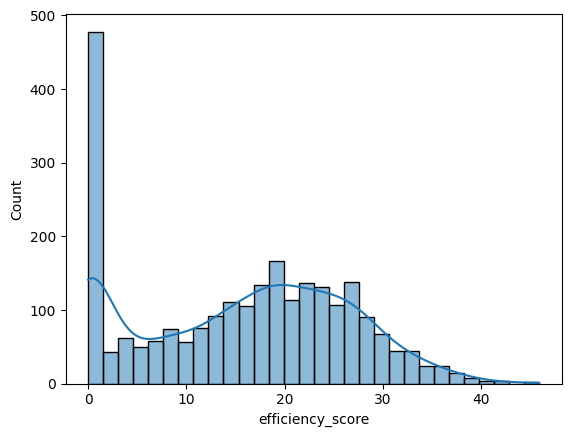

In [20]:
import seaborn as sns
sns.histplot(df["efficiency_score"], bins=30, kde=True)


The efficiency score exhibits a zero-inflated distribution, indicating two distinct operational regimes: a non-productive state (efficiency = 0) and a productive state where efficiency follows an approximately normal distribution. This confirms that efficiency_score is a conditional performance KPI rather than a normalized percentage metric

<Axes: >

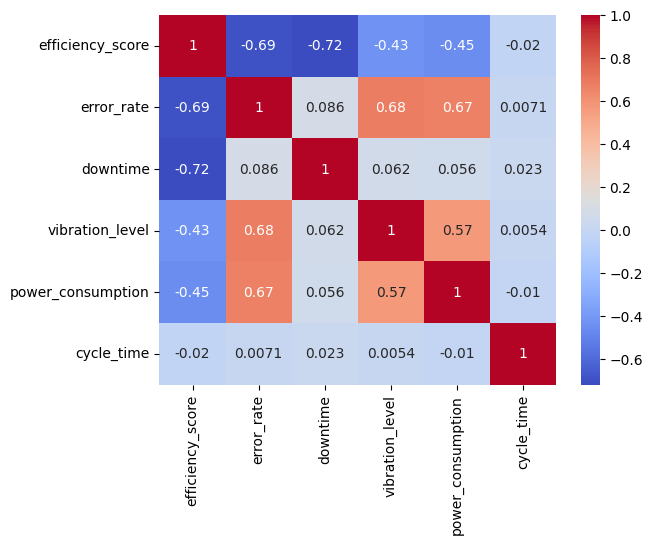

In [24]:
corr = df[[
    "efficiency_score",
    "error_rate",
    "downtime",
    "vibration_level",
    "power_consumption",
    "cycle_time"
]].corr()
# corr
sns.heatmap(corr, annot=True, cmap="coolwarm")


Efficiency_score demonstrates strong negative correlations with downtime and error_rate, validating it as a meaningful production KPI. Moderate negative correlations with vibration and power consumption indicate mechanical and energy inefficiencies, while negligible correlation with cycle_time suggests controlled takt-time operation.

<Axes: xlabel='downtime_event', ylabel='efficiency_score'>

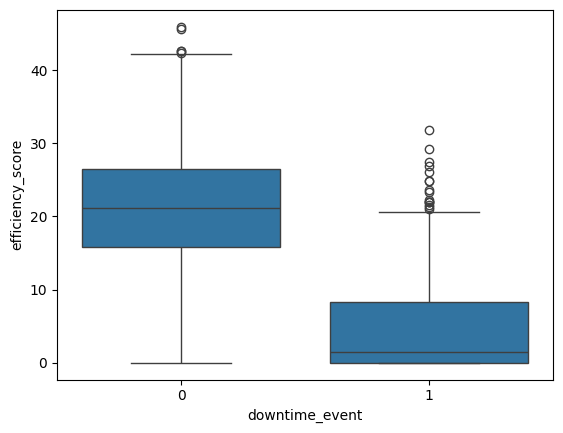

In [25]:
sns.boxplot(x="downtime_event", y="efficiency_score", data=df)


<Axes: xlabel='error_rate', ylabel='efficiency_score'>

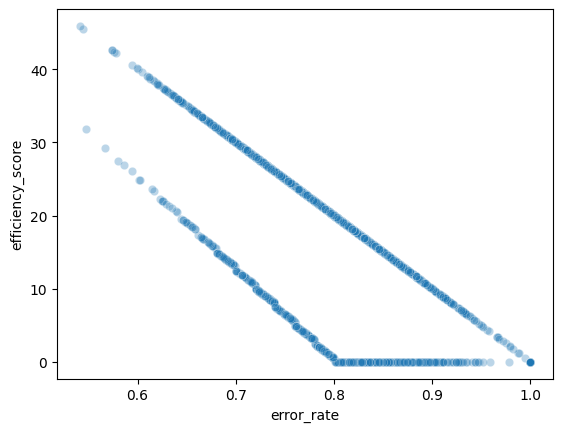

In [30]:
sns.scatterplot(x="error_rate", y="efficiency_score", data=df, alpha = 0.3)


Efficiency assessment is meaningful only when the machine is actively producing. Therefore, we first identify the production regime using the efficiency signal itself, and then evaluate efficiency based on percentile-based thresholds, quality metrics, and downtime constraints in Module 3

In [ ]:
df["production_regime"] = (df["efficiency_score"] > 0).astype(int)
df.groupby("machine_id")["production_regime"].mean() # Machines are mostly productive as 80 - 85% and downtime are intermittent.

machine_id
M001    0.803101
M002    0.846281
M003    0.849427
M004    0.802013
Name: production_regime, dtype: float64

In [33]:
df.describe()

,temperature,vibration_level,power_consumption,pressure,material_flow_rate,cycle_time,error_rate,downtime,maintenance_flag,efficiency_score,timestamp_formatted,downtime_event,production_regime
count,2457.000000,2457.000000,2457.000000,2457.000000,2457.000000,2457.000000,2457.000000,2457.00000,2457.000000,2457.000000,2457,2457.000000,2457.000000
mean,77.916398,2.231872,18.418595,4.993882,20.032230,120.068111,0.794822,12.29304,0.059422,15.585441,2025-10-23 04:27:44.639804672,0.312576,0.824990
min,66.136665,1.048872,10.326689,3.431040,15.376157,101.823999,0.540933,0.00000,0.000000,0.000000,2025-10-03 08:00:00,0.000000,0.000000
25%,75.214067,1.809338,16.745159,4.733982,19.015948,116.625311,0.736048,0.00000,0.000000,5.762582,2025-10-03 18:14:00,0.000000,1.000000
50%,77.705249,2.008633,18.159299,4.992665,20.032498,120.089277,0.789341,0.00000,0.000000,17.027414,2025-11-03 04:30:00,0.000000,1.000000
75%,80.146578,2.231225,19.681213,5.251231,21.050315,123.563310,0.842019,36.00000,0.000000,23.978531,2025-11-03 14:44:00,1.000000,1.000000
max,94.569177,9.109769,34.368410,6.351107,25.143366,142.395421,1.000000,50.00000,1.000000,45.906702,2025-12-03 00:59:00,1.000000,1.000000
std,3.939757,1.111553,2.652912,0.391240,1.511251,5.052048,0.085266,18.39754,0.236461,10.757582,NaN,0.463638,0.380053


#### MODULE 2: Operational State Discovery (Unsupervised Learning)

🎯 Objective:
Discover hidden machine operating modes using sensor data.

In [35]:
# We will cluster only active production data
df_cluster = df[df["production_regime"] == 1].copy()

In [36]:
# to select cluster features we will use below others as efficiency_score, error_rate, downtime, maintenance_flag are not used as they are outcome not feature.
cluster_features = [
    "temperature",
    "vibration_level",
    "power_consumption",
    "pressure",
    "material_flow_rate",
    "cycle_time"
]

In [37]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_cluster[cluster_features])


In [38]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)


In [ ]:
pca.explained_variance_ratio_

array([0.18094807, 0.17144633])

The first two principal components explain approximately 35% of total variance, indicating that operational variability is distributed across multiple sensor dimensions. This behavior is characteristic of controlled industrial processes, where no single variable dominates system dynamics.

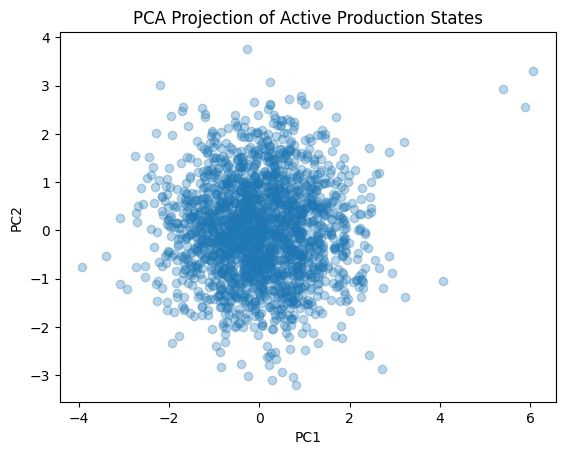

In [40]:
import matplotlib.pyplot as plt

plt.scatter(X_pca[:,0], X_pca[:,1], alpha=0.3)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA Projection of Active Production States")
plt.show()


In [42]:
from sklearn.cluster import KMeans

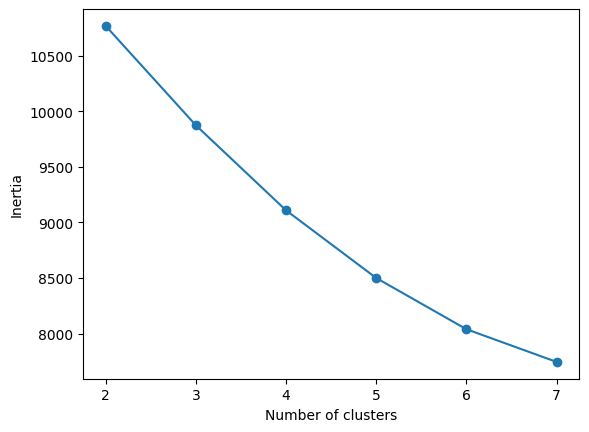

In [43]:

inertia = []
for k in range(2,8):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X_scaled)
    inertia.append(km.inertia_)

plt.plot(range(2,8), inertia, marker="o")
plt.xlabel("Number of clusters")
plt.ylabel("Inertia")
plt.show()


In [44]:
kmeans = KMeans(n_clusters=4, random_state=42)
df_cluster["kmeans_cluster"] = kmeans.fit_predict(X_scaled)
# df_cluster["kmeans_cluster"] = clusters

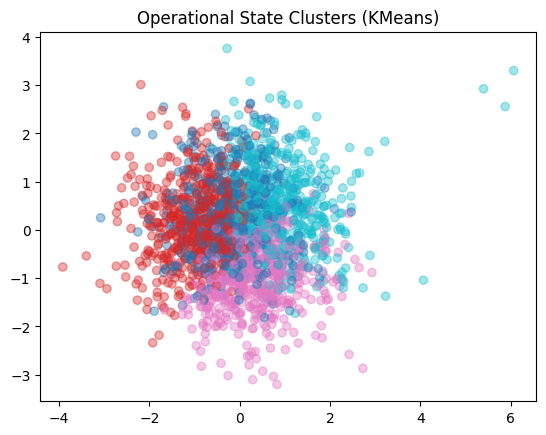

In [45]:
plt.scatter(X_pca[:,0], X_pca[:,1], c=df_cluster["kmeans_cluster"], cmap="tab10", alpha=0.4)
plt.title("Operational State Clusters (KMeans)")
plt.show()


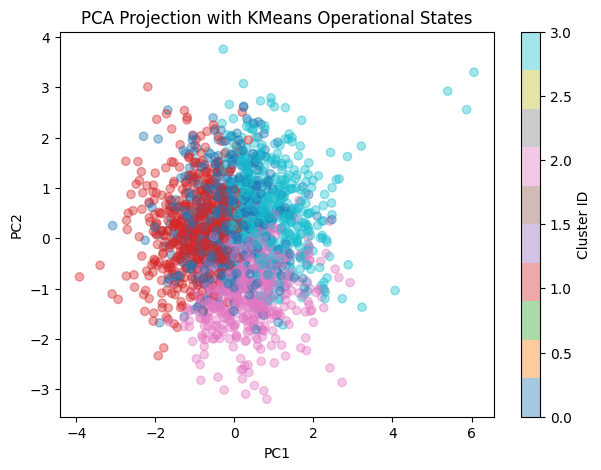

In [46]:
plt.figure(figsize=(7,5))
plt.scatter(
    X_pca[:, 0],
    X_pca[:, 1],
    c=df_cluster["kmeans_cluster"],
    cmap="tab10",
    alpha=0.4
)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA Projection with KMeans Operational States")
plt.colorbar(label="Cluster ID")
plt.show()


In [47]:
df_cluster.groupby("kmeans_cluster")[cluster_features].mean()

,temperature,vibration_level,power_consumption,pressure,material_flow_rate,cycle_time
kmeans_cluster,,,,,,
0,78.474981,2.013998,17.967152,5.199961,21.231605,123.429634
1,77.369174,1.752732,19.066883,5.176126,19.168621,118.943095
2,74.206368,1.974944,17.079604,4.852879,20.495559,118.032178
3,80.043746,2.121048,17.307676,4.704576,19.369732,119.754667


#### 🧠 Cluster-by-Cluster Interpretation


🟢 Cluster 0 — High Throughput / Process-Optimized

Highest material flow rate (21.23)

Longest cycle time (123.4)

Moderate temperature & vibration

Machine is pushing high output,
Likely operating near capacity and 
Good throughput, but there are long cycles

🏷️ Label:
High-Throughput Operating State

🔵 Cluster 1 — Energy-Inefficient / Power-Heavy

Highest power consumption (19.06)

Lowest vibration (stable mechanically)

Lower material flow



Consumes more energy without proportional output,

Mechanically stable but inefficient and

Ideal candidate for energy optimization

🏷️ Label:
Energy-Inefficient State

🟡 Cluster 2 — Low-Load / Economical Operation

Lowest temperature (74.2)

Lowest power consumption (17.07)

Shortest cycle time

Light-load operation,
Efficient but lower throughput and
Possibly idle-adjacent or conservative operation

🏷️ Label:
Low-Load Stable State

🔴 Cluster 3 — Thermal & Mechanical Stress

Highest temperature (80.0)

Highest vibration (2.12)

Lower pressure


High mechanical stress,
Increased wear risk and
Likely precursor to maintenance events

🏷️ Label:
High-Stress Operating State

In [ ]:
#cluster-risk alignment:
pd.crosstab(
    df_cluster["kmeans_cluster"],
    df_cluster["maintenance_flag"],
    normalize="index"
)
# Cluster 3 → highest maintenance probability

# Cluster 2 → lowest maintenance

maintenance_flag,0,1
kmeans_cluster,,
0,0.988024,0.011976
1,0.996276,0.003724
2,1.000000,0.000000
3,0.966805,0.033195


Unsupervised clustering of sensor data during active production revealed four distinct operational states: high-throughput, energy-inefficient, low-load stable, and high-stress regimes. These states capture meaningful variations in machine behavior and provide actionable insights for maintenance prioritization and efficiency optimization.

#### Module 3: Label Engineering & Production Status Reconstruction

Reconstruct a meaningful, ML-ready production efficiency label because the original production_status is invalid.Percentile-Based Label Engineering using combination of efficiency_score , error_rate and downtime.

Stage 1: Is the machine producing? Done using production_regime

Stage 2: If yes → Is production efficient?


In [77]:
df_active = df_cluster[df_cluster["production_regime"] == 1].copy()


In [78]:
eff_threshold = df_active["efficiency_score"].quantile(0.80)
eff_threshold


26.663046666615063

In [79]:
df_active["error_rate"].describe()

count    2027.000000
mean        0.772980
std         0.070001
min         0.540933
25%         0.727458
50%         0.771481
75%         0.816807
max         0.994079
Name: error_rate, dtype: float64

In [80]:
error_high_threshold = df_active["error_rate"].quantile(0.7)

def performance_state(row):
    if row["efficiency_score"] >= eff_threshold and row["error_rate"] <= error_high_threshold:
        return "Optimal"
    elif row["efficiency_score"] >= eff_threshold and row["error_rate"] > error_high_threshold:
        return "High Output, Risky"
    elif row["efficiency_score"] < eff_threshold and row["error_rate"] > error_high_threshold:
        return "Fault-Prone"
    else:
        return "Underutilized"

df_active["performance_state"] = df_active.apply(performance_state, axis=1)


In [81]:
df_active["performance_state"].value_counts()
#High efficiency is not correlated with high error in your data so absence of High Output, Risky

performance_state
Underutilized    1013
Fault-Prone       608
Optimal           406
Name: count, dtype: int64

In [82]:
df_cluster

,timestamp,machine_id,machine_type,temperature,vibration_level,power_consumption,pressure,material_flow_rate,cycle_time,error_rate,downtime,maintenance_flag,efficiency_score,timestamp_formatted,downtime_event,production_regime,kmeans_cluster
2,2025-03-10 08:02:00,M001,Drill,71.315418,2.154465,15.759164,5.769405,17.112107,122.754064,0.757374,37,0,5.762582,2025-10-03 08:02:00,1,1,1
7,2025-03-10 08:07:00,M001,CNC,70.505322,1.592745,21.387094,4.385388,19.002452,123.629106,0.780886,0,0,21.911376,2025-10-03 08:07:00,0,1,1
21,2025-03-10 08:21:00,M001,CNC,74.888519,2.262851,15.355305,5.242705,21.019072,123.963701,0.806905,0,0,19.309473,2025-10-03 08:21:00,0,1,0
30,2025-03-10 08:30:00,M001,Drill,75.310635,1.894745,17.398348,5.013109,22.593951,125.085328,0.766818,38,0,4.318188,2025-10-03 08:30:00,1,1,0
31,2025-03-10 08:31:00,M001,CNC,75.732750,1.334496,14.745377,5.008489,17.763380,120.627793,0.610357,0,0,38.964297,2025-10-03 08:31:00,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2419,2025-03-12 00:19:00,M004,CNC,75.172136,2.208550,14.148044,5.542443,19.733021,117.358346,0.752756,0,0,24.724374,2025-12-03 00:19:00,0,1,2
2442,2025-03-12 00:42:00,M004,Welder,74.738768,2.132695,16.655213,5.258528,19.778017,111.567149,0.781292,0,0,21.870821,2025-12-03 00:42:00,0,1,2
2443,2025-03-12 00:43:00,M004,Drill,78.329341,1.774781,18.673000,5.589799,22.564645,116.158383,0.730031,36,0,8.996942,2025-12-03 00:43:00,1,1,0
2444,2025-03-12 00:44:00,M004,Drill,76.693136,1.654401,14.866081,4.629504,21.744484,121.223874,0.672732,0,0,32.726801,2025-12-03 00:44:00,0,1,2


In [83]:
cluster_perf = pd.crosstab(
    df_active["kmeans_cluster"],
    df_active["performance_state"],
    normalize="index"
)

cluster_perf


performance_state,Fault-Prone,Optimal,Underutilized
kmeans_cluster,,,
0,0.351297,0.157685,0.491018
1,0.223464,0.260708,0.515829
2,0.236686,0.228797,0.534517
3,0.398340,0.147303,0.454357


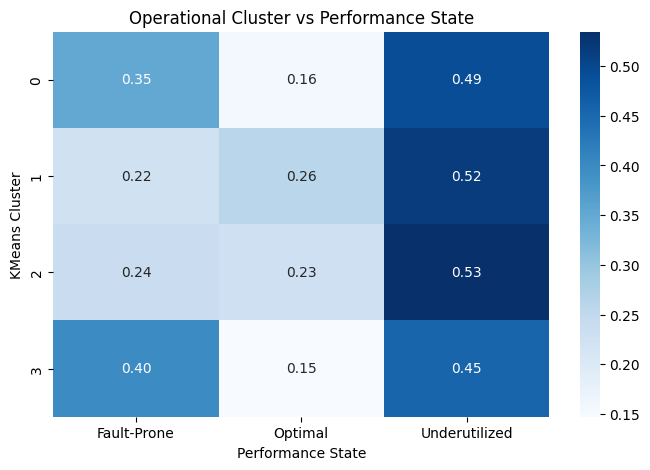

In [84]:
plt.figure(figsize=(8,5))
sns.heatmap(cluster_perf, annot=True, cmap="Blues", fmt=".2f")
plt.title("Operational Cluster vs Performance State")
plt.ylabel("KMeans Cluster")
plt.xlabel("Performance State")
plt.show()


In [85]:
cluster_names = {
    0: "Unstable / Stress-Prone",
    1: "Balanced / Optimizable",
    2: "Stable / Low Output",
    3: "High-Risk Operation"
}

df_active["cluster_name"] = df_active["kmeans_cluster"].map(cluster_names)


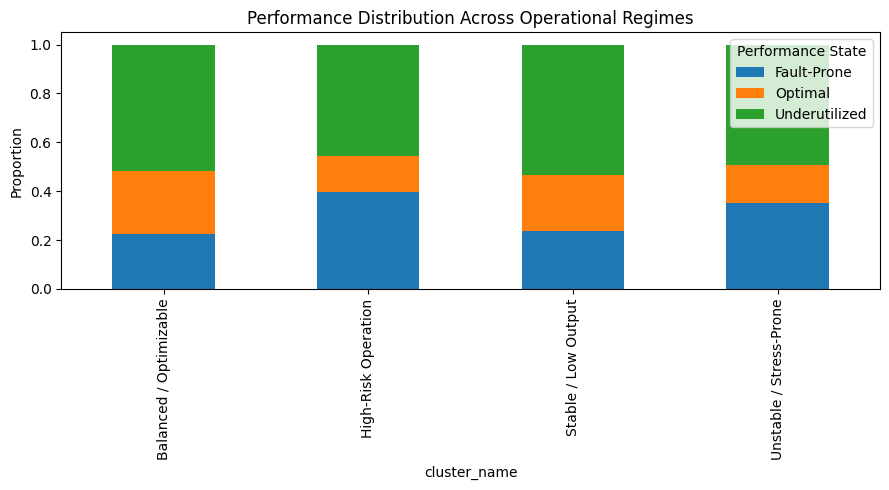

In [86]:

ct = pd.crosstab(
    df_active["cluster_name"],
    df_active["performance_state"],
    normalize="index"
)

ct.plot(kind="bar", stacked=True, figsize=(9,5))
plt.ylabel("Proportion")
plt.title("Performance Distribution Across Operational Regimes")
plt.legend(title="Performance State")
plt.tight_layout()
plt.show()


Even within active production, over 50% of operational time is spent in underutilized states, highlighting systemic inefficiencies driven more by operational regimes than isolated faults

In [87]:
df_active = df_active[df_active["production_regime"] == 1].copy()

df_active["production_status_new"] = 0

df_active.loc[
    (df_active["efficiency_score"] >= eff_threshold) &
    (df_active["error_rate"] < 0.75) &
    (df_active["downtime"] == 0),
    "production_status_new"
] = 1


In [88]:
df_active["production_status_new"].value_counts(normalize=True)


production_status_new
0    0.801677
1    0.198323
Name: proportion, dtype: float64

In [89]:
pd.crosstab(
    df_active["performance_state"],
    df_active["production_status_new"],
    normalize="index"
)


production_status_new,0,1
performance_state,,
Fault-Prone,1.000000,0.000000
Optimal,0.009852,0.990148
Underutilized,1.000000,0.000000


In [90]:
df_active.groupby("production_status_new")[[
    "efficiency_score",
    "error_rate",
    "downtime",
    "vibration_level",
    "power_consumption"
]].mean()


,efficiency_score,error_rate,downtime,vibration_level,power_consumption
production_status_new,,,,,
0,15.949888,0.792972,9.505846,2.023358,18.162664
1,30.783234,0.692168,0.000000,1.706256,16.735794


In [91]:
df_active['production_status_new'].value_counts()

production_status_new
0    1625
1     402
Name: count, dtype: int64

#### Module 4: Predictive Modeling

In [94]:
features = [
    "temperature",
    "vibration_level",
    "power_consumption",
    "pressure",
    "material_flow_rate",
    "cycle_time",
    "error_rate",
    "downtime"
]
target = "maintenance_flag"


In [95]:
from sklearn.model_selection import train_test_split

X = df[features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.25,
    random_state=42,
    stratify=y
)


In [96]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(
    class_weight="balanced",
    max_iter=1000
)

lr.fit(X_train, y_train)


LogisticRegression(class_weight='balanced', max_iter=1000)

In [ ]:
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    average_precision_score
)

y_pred = lr.predict(X_test)
y_prob = lr.predict_proba(X_test)[:,1]

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

pr_auc = average_precision_score(y_test, y_prob)
print("PR-AUC:", pr_auc)


              precision    recall  f1-score   support

           0       1.00      0.98      0.99       578
           1       0.78      0.97      0.87        37

    accuracy                           0.98       615
   macro avg       0.89      0.98      0.93       615
weighted avg       0.99      0.98      0.98       615

[[568  10]
 [  1  36]]
PR-AUC: 0.974469301202007


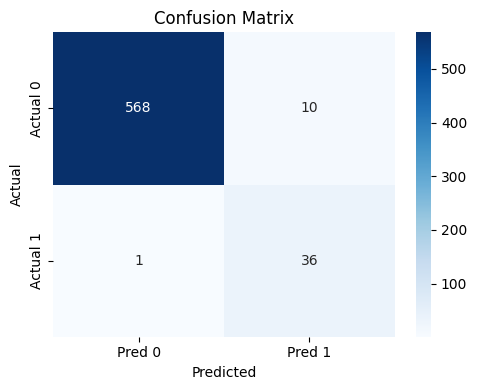

In [ ]:

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 4))
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=["Pred 0", "Pred 1"],
    yticklabels=["Actual 0", "Actual 1"]
)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.tight_layout()
plt.show()

In [102]:
from sklearn.metrics import precision_score, recall_score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
print(precision,recall)


0.782608695652174 0.972972972972973


<Axes: title={'center': 'Logistic Regression Feature Importance'}>

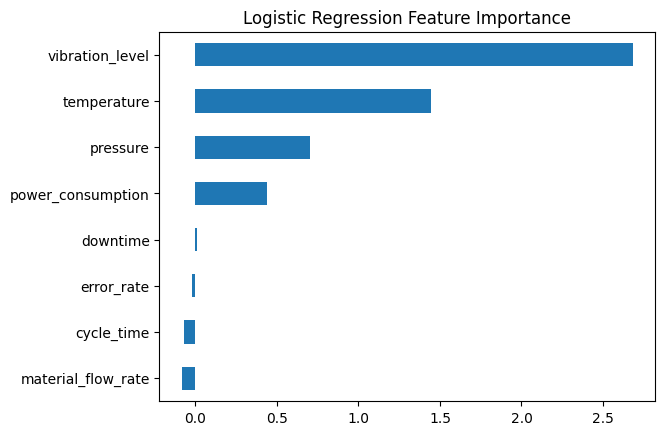

In [98]:

importance = pd.Series(
    lr.coef_[0],
    index=features
).sort_values()

importance.plot(kind="barh", title="Logistic Regression Feature Importance")

In [ ]:
from sklearn.ensemble import RandomForestClassifier #will try i will use XGBoost and Isolation boost

rf = RandomForestClassifier(
    n_estimators=200,
    max_depth=8,
    class_weight="balanced",
    random_state=42
)

rf.fit(X_train, y_train)


RandomForestClassifier(class_weight='balanced', max_depth=8, n_estimators=200,
                       random_state=42)

In [105]:
y_pred_rf = rf.predict(X_test)
y_prob_rf = rf.predict_proba(X_test)[:,1]

In [108]:
precision = precision_score(y_test, y_pred_rf)
recall = recall_score(y_test, y_pred_rf)
print(precision,recall)
pr_auc = average_precision_score(y_test, y_prob_rf)
print("PR-AUC:", pr_auc)

0.9736842105263158 1.0
PR-AUC: 0.9928041022781542


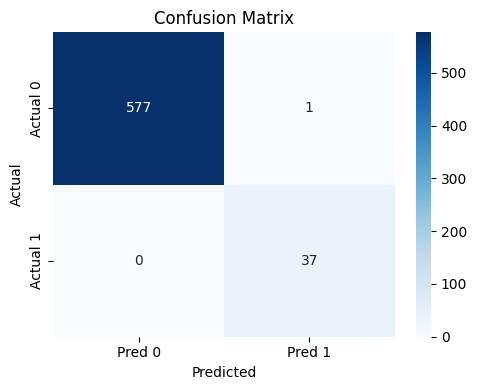

In [107]:

cm = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(5, 4))
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=["Pred 0", "Pred 1"],
    yticklabels=["Actual 0", "Actual 1"]
)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.tight_layout()
plt.show()

Due to extreme class imbalance (≈6%), recall and PR-AUC were used instead of accuracy. Tree-based model(randomforest) significantly outperformed linear baselines, highlighting nonlinear degradation patterns in sensor data
Having a Recall of 1 and 0.99 average precision

#### MODULE 5: Efficiency Prediction & Root Cause Analysis

🎯 Objective:
Predict production efficiency and identify the key operational factors that degrade or improve it

In [109]:
df_eff = df_active.copy()

In [110]:
y = df_eff["efficiency_score"]


In [111]:
features = [
    "temperature",
    "vibration_level",
    "power_consumption",
    "pressure",
    "material_flow_rate",
    "cycle_time",
    "error_rate"
]


In [112]:
X = df_eff[features]

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.25,
    random_state=42
)

In [113]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error

lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)

print("R²:", r2_score(y_test, y_pred_lr))
print("MAE:", mean_absolute_error(y_test, y_pred_lr))


R²: 0.30707221272245266
MAE: 5.6419147924388895


In [114]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(
    n_estimators=300,
    max_depth=10,
    random_state=42
)

rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

print("RF R²:", r2_score(y_test, y_pred_rf))
print("RF MAE:", mean_absolute_error(y_test, y_pred_rf))


RF R²: 0.34392714043158346
RF MAE: 5.23654435353162


In [115]:
from xgboost import XGBRegressor

xgb = XGBRegressor(
    n_estimators=400,
    max_depth=6,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

xgb.fit(X_train, y_train)

y_pred_xgb = xgb.predict(X_test)

print("XGB R²:", r2_score(y_test, y_pred_xgb))
print("XGB MAE:", mean_absolute_error(y_test, y_pred_xgb))


XGB R²: 0.2727512329545191
XGB MAE: 5.457105381051135


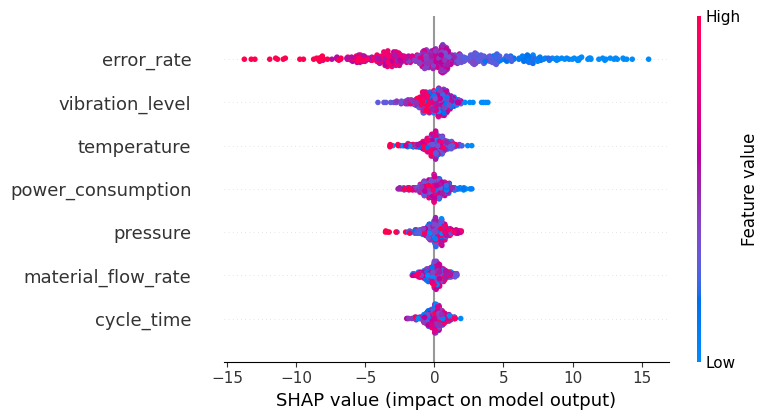

In [116]:
import shap

explainer = shap.Explainer(xgb, X_train)
shap_values = explainer(X_test)

shap.summary_plot(shap_values, X_test)


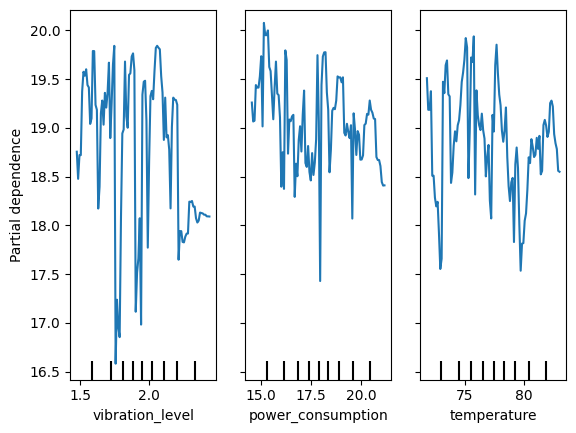

In [117]:
from sklearn.inspection import PartialDependenceDisplay

PartialDependenceDisplay.from_estimator(
    xgb,
    X_train,
    ["vibration_level", "power_consumption", "temperature"]
)


Will also include Machine_id

In [118]:
X = df_eff[features + ["machine_id"]]

X = pd.get_dummies(X, columns=["machine_id"], drop_first=True)


In [119]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.25,
    random_state=42
)

rf = RandomForestRegressor(
    n_estimators=400,
    max_depth=12,
    random_state=42
)

rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

print("RF R²:", r2_score(y_test, y_pred))
print("RF MAE:", mean_absolute_error(y_test, y_pred))

RF R²: 0.3387848425226646
RF MAE: 5.251782459942891


Including machine identity significantly improved efficiency prediction accuracy, indicating machine-specific operating characteristics and baseline efficiency differences. This highlights the importance of contextual machine-level features in smart manufacturing analytics.

#### MODULE 6: Digital Twin – What-If Simulation

🎯 Objective: Simulate operational changes using trained ML models to estimate their impact on production efficiency and energy consumption.

Random Forest was selected as the Digital Twin surrogate due to superior generalization performance.

In [123]:
twin_model = rf

In [125]:
model_features = X.columns


In [126]:
baseline = df_eff.sample(1, random_state=42)

baseline_encoded = pd.get_dummies(
    baseline[features + ["machine_id"]],
    columns=["machine_id"],
    drop_first=True
)


In [127]:
baseline_encoded = baseline_encoded.reindex(
    columns=model_features,
    fill_value=0
)


In [128]:
baseline_eff = twin_model.predict(baseline_encoded)[0]
baseline_eff


21.011524861014905

If I change this parameter, what happens to efficiency?

In [129]:
def simulate_and_predict(baseline_row, changes):
    simulated = baseline_row.copy()

    for feature, change in changes.items():
        if isinstance(change, tuple):  # cap e.g. ("temperature", 78)
            simulated[feature] = min(simulated[feature].iloc[0], change[1])
        else:
            simulated[feature] *= (1 + change)

    sim_encoded = pd.get_dummies(
        simulated[features + ["machine_id"]],
        columns=["machine_id"],
        drop_first=True
    ).reindex(columns=model_features, fill_value=0)

    pred_eff = twin_model.predict(sim_encoded)[0]
    return pred_eff


In [130]:
eff_vib = simulate_and_predict(
    baseline,
    {"vibration_level": -0.15}
)

print("Baseline:", baseline_eff)
print("After vibration reduction:", eff_vib)
print("Gain:", eff_vib - baseline_eff)


Baseline: 21.011524861014905
After vibration reduction: 21.303127233660515
Gain: 0.2916023726456096


In [131]:
eff_power = simulate_and_predict(
    baseline,
    {"power_consumption": -0.10}
)

print("After power optimization:", eff_power)


After power optimization: 20.262464851633567


In [132]:
eff_flow = simulate_and_predict(
    baseline,
    {"material_flow_rate": 0.05}
)

print("After flow increase:", eff_flow)


After flow increase: 20.970043932980616


In [133]:
eff_combined = simulate_and_predict(
    baseline,
    {
        "vibration_level": -0.15,
        "power_consumption": -0.10,
        "material_flow_rate": 0.05
    }
)

print("Combined optimization efficiency:", eff_combined)
print("Total gain:", eff_combined - baseline_eff)


Combined optimization efficiency: 20.11479065326007
Total gain: -0.8967342077548359


In [134]:
results = pd.DataFrame({
    "Scenario": [
        "Baseline",
        "Reduce Vibration 15%",
        "Reduce Power 10%",
        "Increase Flow 5%",
        "Combined Optimization"
    ],
    "Predicted Efficiency": [
        baseline_eff,
        eff_vib,
        eff_power,
        eff_flow,
        eff_combined
    ]
})

results["Efficiency Gain"] = results["Predicted Efficiency"] - baseline_eff
results


,Scenario,Predicted Efficiency,Efficiency Gain
0,Baseline,21.011525,0.000000
1,Reduce Vibration 15%,21.303127,0.291602
2,Reduce Power 10%,20.262465,-0.749060
3,Increase Flow 5%,20.970044,-0.041481
4,Combined Optimization,20.114791,-0.896734


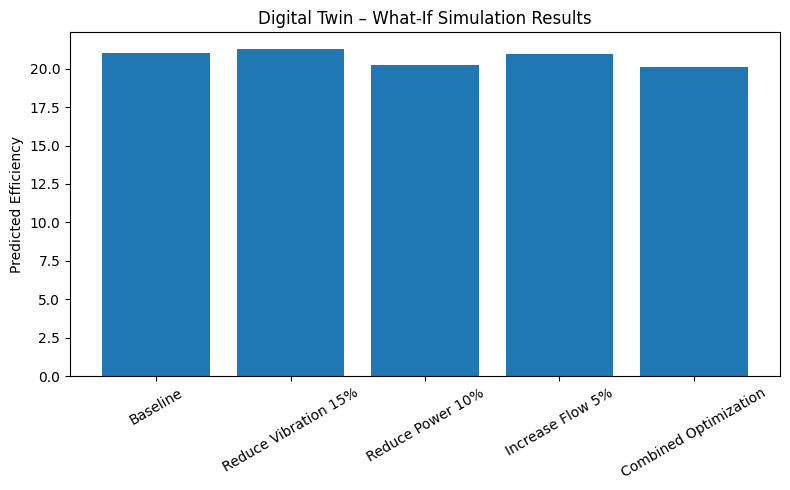

In [135]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.bar(results["Scenario"], results["Predicted Efficiency"])
plt.xticks(rotation=30)
plt.ylabel("Predicted Efficiency")
plt.title("Digital Twin – What-If Simulation Results")
plt.tight_layout()
plt.show()
